<a href="https://colab.research.google.com/github/Inha-AI/DACON-semiconductor-competition/blob/feature%2FYoonSungLee/submission_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import BatchNormalization

In [10]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
df_train = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/train.csv')
df_test = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/test.csv')

In [0]:
# 독립변수와 종속변수를 분리합니다.

train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

# Model 7

* 8 layers
* (108, 82, 56, 30) units, he_normal, relu
* BatchNormalization
* Adam(0.008)
* epochs 100
* batch_size 500
<br><br>
* layer의 층을 두 배로 늘림
* layer의 층을 더 쌓고, 양쪽 layer units의 평균을 해당 layer units으로 설정
* learning_rate 변경
* Model 6보다 성능이 떨어짐

In [13]:
# 케라스를 통해 모델 생성을 시작합니다.

model_07 = Sequential()
model_07.add(Dense(units=108, input_dim=226, kernel_initializer='he_normal'))
model_07.add(Dense(units=108, kernel_initializer='he_normal'))
model_07.add(BatchNormalization())
model_07.add(Activation('relu'))
model_07.add(Dense(units=82, kernel_initializer='he_normal'))
model_07.add(Dense(units=82, kernel_initializer='he_normal'))
model_07.add(BatchNormalization())
model_07.add(Activation('relu'))
model_07.add(Dense(units=56, kernel_initializer='he_normal'))
model_07.add(Dense(units=56, kernel_initializer='he_normal'))
model_07.add(BatchNormalization())
model_07.add(Activation('relu'))
model_07.add(Dense(units=30, kernel_initializer='he_normal'))
model_07.add(Dense(units=30, kernel_initializer='he_normal'))
model_07.add(BatchNormalization())
model_07.add(Activation('relu'))

model_07.add(Dense(units=4, activation='linear'))

adam = keras.optimizers.Adam(0.008)
model_07.compile(loss='mae', optimizer=adam, metrics=['accuracy'])

hist = model_07.fit(train_X, train_Y, epochs=100, batch_size=500, validation_split=0.05)

Train on 769500 samples, validate on 40500 samples
Epoch 1/100
769500/769500 [==============================] - 36s 47us/step - loss: 52.1929 - acc: 0.4741 - val_loss: 54.2236 - val_acc: 0.3087
Epoch 2/100
769500/769500 [==============================] - 34s 44us/step - loss: 27.6598 - acc: 0.7037 - val_loss: 40.5441 - val_acc: 0.5353
Epoch 3/100
769500/769500 [==============================] - 34s 44us/step - loss: 23.8062 - acc: 0.7426 - val_loss: 45.5877 - val_acc: 0.4272
Epoch 4/100
769500/769500 [==============================] - 34s 44us/step - loss: 22.0374 - acc: 0.7611 - val_loss: 47.3105 - val_acc: 0.3228
Epoch 5/100
769500/769500 [==============================] - 34s 44us/step - loss: 20.9099 - acc: 0.7720 - val_loss: 44.6666 - val_acc: 0.4082
Epoch 6/100
769500/769500 [==============================] - 34s 45us/step - loss: 20.0806 - acc: 0.7800 - val_loss: 37.6037 - val_acc: 0.4886
Epoch 7/100
769500/769500 [==============================] - 34s 44us/step - loss: 19.3920 

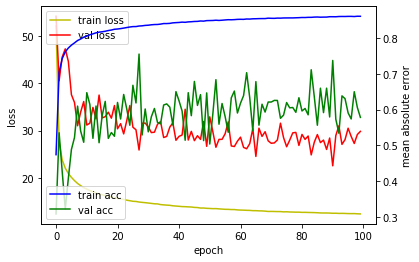

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean absolute error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 예측값을 생성합니다.

pred_test_07 = model_07.predict(test_X)

In [0]:
# submission 파일을 생성합니다.
sample_sub = pd.read_csv('/gdrive/My Drive/DACON-semiconductor-competition/dataset/sample_submission.csv', index_col=0)
submission = sample_sub+pred_test_07
submission.to_csv('/gdrive/My Drive/DACON-semiconductor-competition/submission_07.csv')